In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load dataset
fname_train = "train.csv"
fname_test = "test.csv"

train_data = pd.read_csv(fname_train)
test_data = pd.read_csv(fname_test)

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#Create Family from SibSp and Parch
train_data['Family'] = train_data['SibSp']+train_data['Parch']
test_data['Family'] = test_data['SibSp']+test_data['Parch']

In [5]:
test = pd.DataFrame()
test['PassengerId'] = test_data['PassengerId']
#Drop PassengerId and Ticket
train_data = train_data.drop(['PassengerId', 'Ticket','Cabin','Name', 'SibSp', 'Parch'], axis=1)
test_data = test_data.drop(['PassengerId', 'Ticket', 'Cabin','Name', 'SibSp', 'Parch'], axis=1)

In [6]:
#Replace missing values
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0])
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].value_counts().index[0])
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].value_counts().index[0])

test_data['Embarked'] = test_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0])
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].value_counts().index[0])
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].value_counts().index[0])

In [7]:
#OneHotEncoding of categorial entries
train_data = pd.get_dummies(train_data,columns=['Sex','Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data,columns=['Sex','Embarked'], drop_first=True)

In [8]:
train_data.head()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Family        891 non-null int64
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [10]:
print(train_data.corr())

            Survived    Pclass       Age      Fare    Family  Sex_male  \
Survived    1.000000 -0.338481 -0.052872  0.257307  0.016639 -0.543351   
Pclass     -0.338481  1.000000 -0.356187 -0.549500  0.065997  0.131900   
Age        -0.052872 -0.356187  1.000000  0.107554 -0.236339  0.073377   
Fare        0.257307 -0.549500  0.107554  1.000000  0.217138 -0.182333   
Family      0.016639  0.065997 -0.236339  0.217138  1.000000 -0.200988   
Sex_male   -0.543351  0.131900  0.073377 -0.182333 -0.200988  1.000000   
Embarked_Q  0.003650  0.221009 -0.071806 -0.117216 -0.058592 -0.074115   
Embarked_S -0.149683  0.074053  0.022577 -0.162184  0.077359  0.119224   

            Embarked_Q  Embarked_S  
Survived      0.003650   -0.149683  
Pclass        0.221009    0.074053  
Age          -0.071806    0.022577  
Fare         -0.117216   -0.162184  
Family       -0.058592    0.077359  
Sex_male     -0.074115    0.119224  
Embarked_Q    1.000000   -0.499421  
Embarked_S   -0.499421    1.000000  


In [11]:
from sklearn.decomposition import PCA
#PCA of correlated categories Fare and PClass
df_1 = train_data.loc[:,['Fare','Pclass']]
df_2 = test_data.loc[:,['Fare','Pclass']]
pca =  PCA(n_components=1)
col_1 = pca.fit_transform(df_1)
col_2 = pca.fit_transform(df_2)

train_data_PCA = train_data.copy()
test_data_PCA = test_data.copy()

train_data_PCA['Mod_col_1']=col_1[:,0]
test_data_PCA['Mod_col_1']=col_2[:,0]

train_data_PCA = train_data_PCA.drop(['Fare','Pclass'], axis=1)
test_data_PCA = test_data_PCA.drop(['Fare','Pclass'], axis=1)

In [12]:
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

X_train_PCA = train_data_PCA.drop(['Survived'], axis=1)
y_train_PCA = train_data_PCA['Survived']

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [14]:
#Without PCA
acc = []
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_1 = logreg.predict(test_data)
acc_log = logreg.score(X_train, y_train) * 100
acc.append(acc_log)
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_2 = svc.predict(test_data)
acc_svc = svc.score(X_train,y_train) * 100
acc.append(acc_svc)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
Y_pred_3 = knn.predict(test_data)
acc_knn = knn.score(X_train, y_train) * 100
acc.append(acc_knn)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_4 = decision_tree.predict(test_data)
acc_decision_tree = decision_tree.score(X_train, y_train) * 100
acc.append(acc_decision_tree)
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,y_train)
Y_pred_5= random_forest.predict(test_data)
acc_rf = random_forest.score(X_train,y_train) * 100
acc.append(acc_rf)
clf = MLPClassifier(solver='lbfgs', alpha=2e-5,hidden_layer_sizes=(10, 5), random_state=1)
clf.fit(X_train, y_train)
Y_pred_6= clf.predict(test_data)
acc_clf = clf.score(X_train,y_train) * 100
acc.append(acc_clf)

/home/florian/ml/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/florian/ml/ml/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
#With PCA
acc_PCA = []
logreg = LogisticRegression()
logreg.fit(X_train_PCA, y_train_PCA)
Y_pred_7 = logreg.predict(test_data_PCA)
acc_log_PCA = logreg.score(X_train_PCA, y_train_PCA) * 100
acc_PCA.append(acc_log_PCA)
svc = SVC()
svc.fit(X_train_PCA, y_train_PCA)
Y_pred_8 = svc.predict(test_data_PCA)
acc_svc_PCA = svc.score(X_train_PCA,y_train_PCA) * 100
acc_PCA.append(acc_svc_PCA)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_PCA, y_train_PCA)
Y_pred_9 = knn.predict(test_data_PCA)
acc_knn_PCA = knn.score(X_train_PCA, y_train_PCA) * 100
acc_PCA.append(acc_knn_PCA)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_PCA, y_train_PCA)
Y_pred_10 = decision_tree.predict(test_data_PCA)
acc_decision_tree_PCA = decision_tree.score(X_train_PCA, y_train_PCA) * 100
acc_PCA.append(acc_decision_tree_PCA)
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train_PCA,y_train_PCA)
Y_pred_11 = random_forest.predict(test_data_PCA)
acc_rf_PCA = random_forest.score(X_train_PCA,y_train_PCA) * 100
acc_PCA.append(acc_rf_PCA)
clf = MLPClassifier(solver='lbfgs', alpha=2e-5,hidden_layer_sizes=(10, 5), random_state=1)
clf.fit(X_train_PCA, y_train_PCA)
Y_pred_12 = clf.predict(test_data_PCA)
acc_clf_PCA = clf.score(X_train_PCA,y_train_PCA) * 100
acc_PCA.append(acc_clf_PCA)

/home/florian/ml/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/florian/ml/ml/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


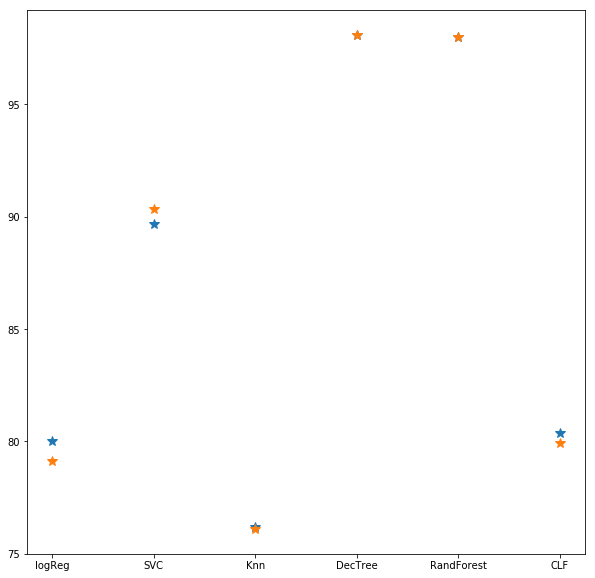

In [16]:
plt.figure(figsize=(10,10))
plt.plot(['logReg','SVC','Knn','DecTree','RandForest','CLF'],acc,'*',markersize=10)
plt.plot(list(range(len(acc))),acc_PCA,'*', markersize=10)
plt.show()

In [17]:
#Grid for RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)
 
print(rf_random.best_params_,rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False} 0.8338945005611672


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_PCA = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_PCA = RandomizedSearchCV(estimator = rf_PCA, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random_PCA.fit(X_train_PCA, y_train_PCA)

print(rf_random.best_params_,rf_random.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False} 0.8338945005611672


In [20]:
#Grid for Decission Tree

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
criterion = ['gini','entropy']
# Number of features to consider at every split
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)
 
print(dt_random.best_params_,dt_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'gini'} 0.813692480359147


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.8s finished


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt_PCA = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random_PCA = RandomizedSearchCV(estimator = dt_PCA, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
dt_random_PCA.fit(X_train_PCA, y_train_PCA)
 
print(dt_random.best_params_,dt_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 100, 'criterion': 'gini'} 0.8103254769921436


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.7s finished


In [28]:
dt = DecisionTreeClassifier(**dt_random_PCA.best_params_)
dt.fit(X_train_PCA, y_train_PCA)
pred = rf.predict(test_data_PCA)

In [29]:
test['Survived']=pred
test.to_csv('out.csv', index=False)

In [ ]:
https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy